# Setup

**Imports**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt


from scipy.linalg import eigh

import pandas as pd

import geopandas
import contextily as cx

**Utility functions**

In [2]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.margins(x=0)
    return fig, ax

# Question 2

3.290835473368651


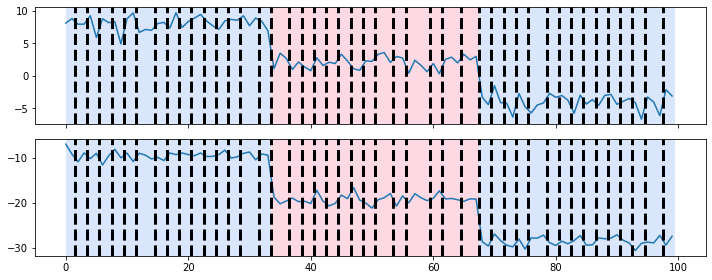

9.686971930656256


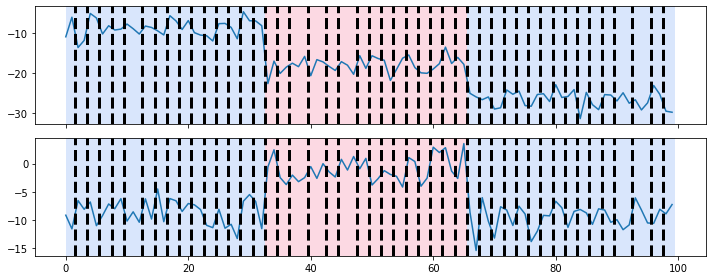

37.80206301930478


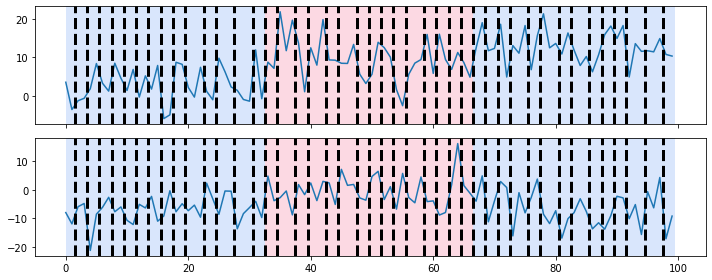

81.72327016120661


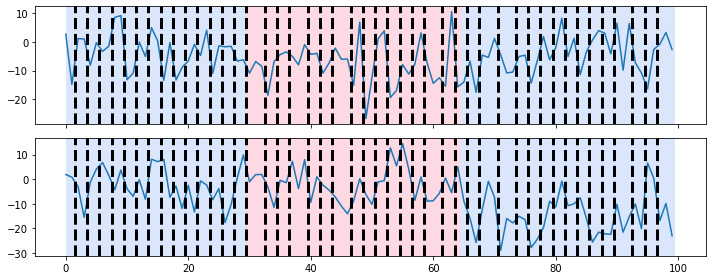

0.7458603268292693


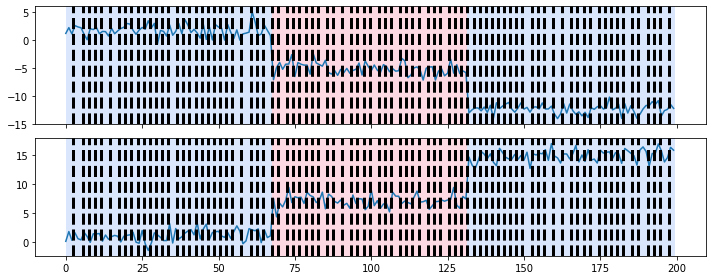

7.587929389898943


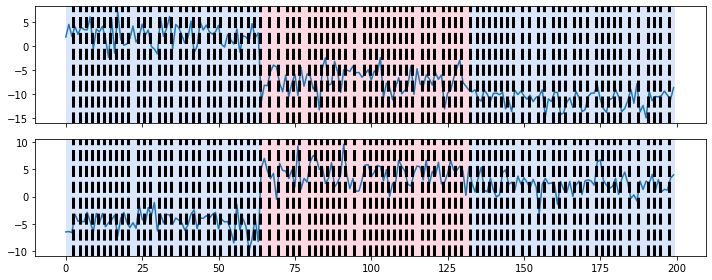

43.985252726441296


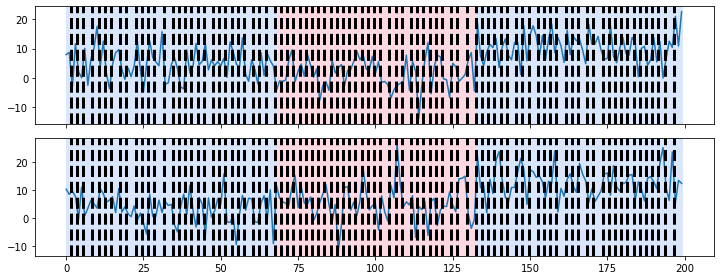

93.16310828279694


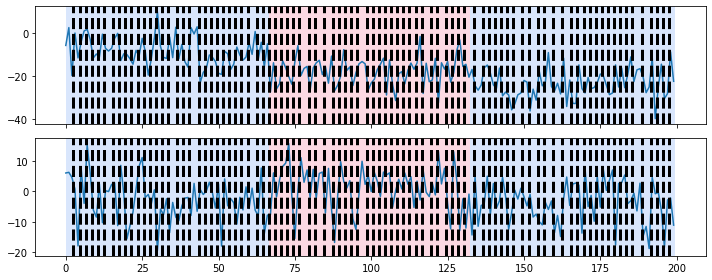

1.9413669878047453


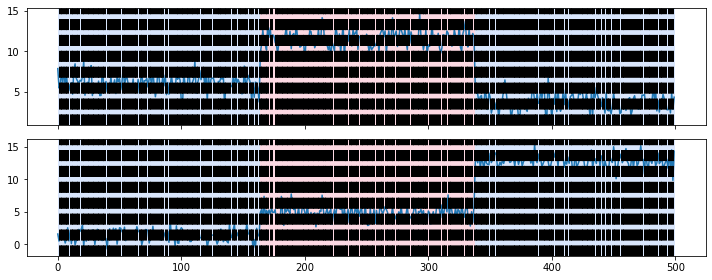

7.718707218096657


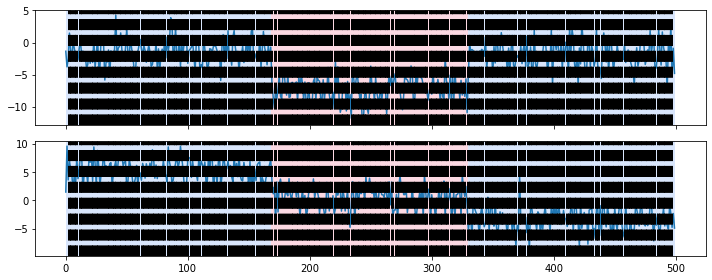

46.017594489210225


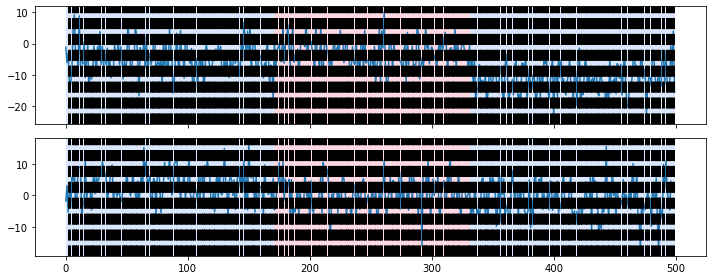

94.77420664991818


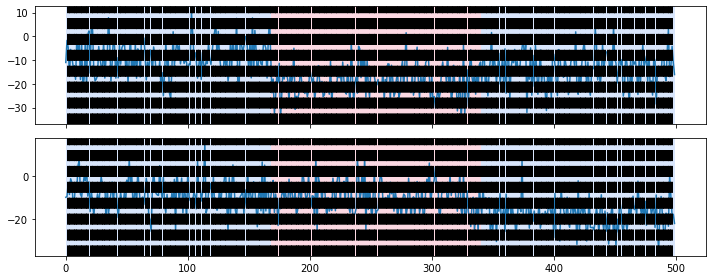

1.7813712872154408


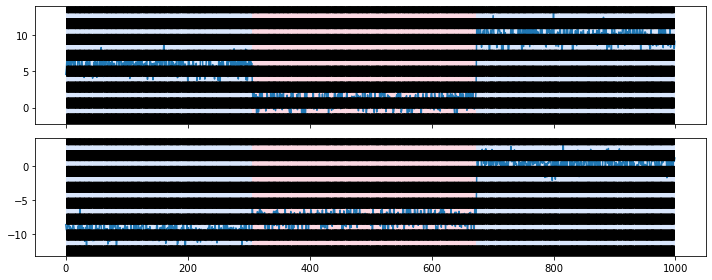

6.328246003462615


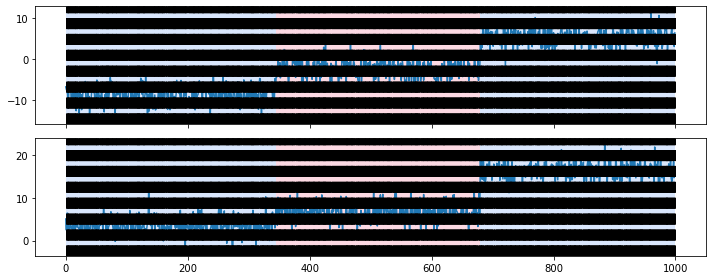

48.17407164196642


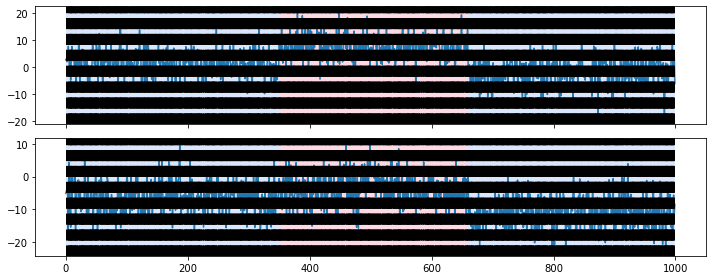

95.00512138195394


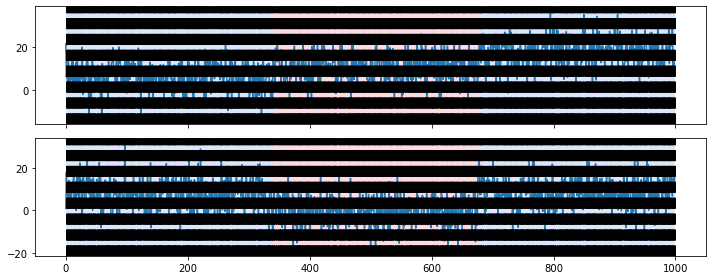

2.340694506068077


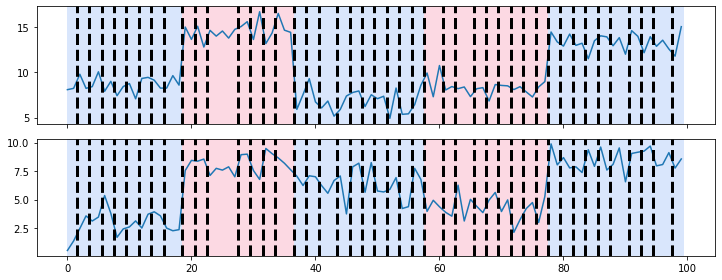

10.696642905272412


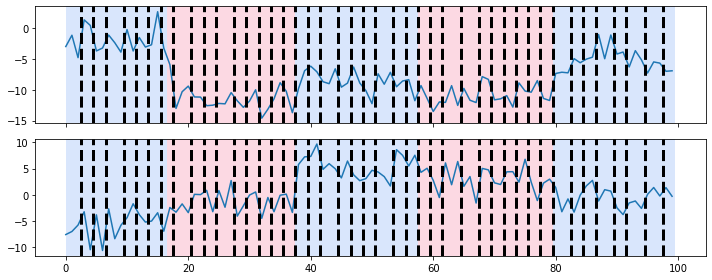

13.29556240041183


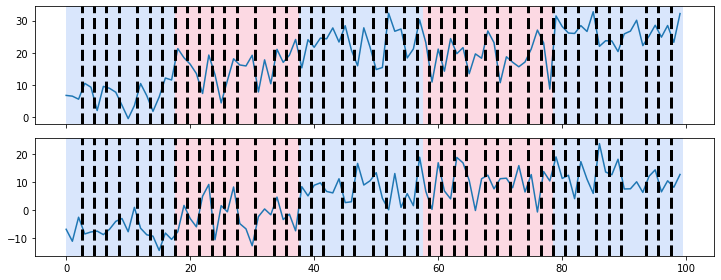

68.88315635715217


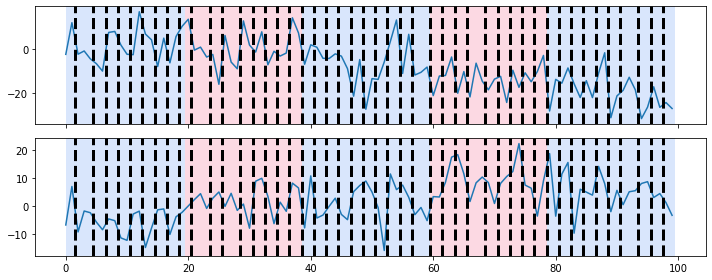

1.4607618920108552


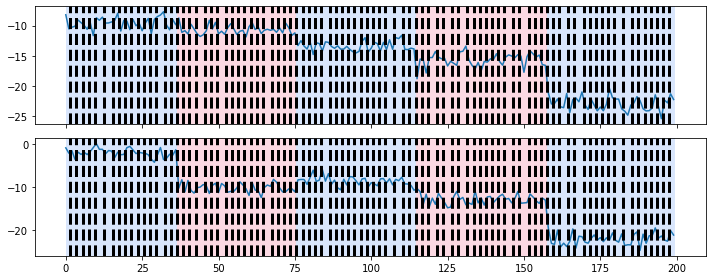

5.951784508794071


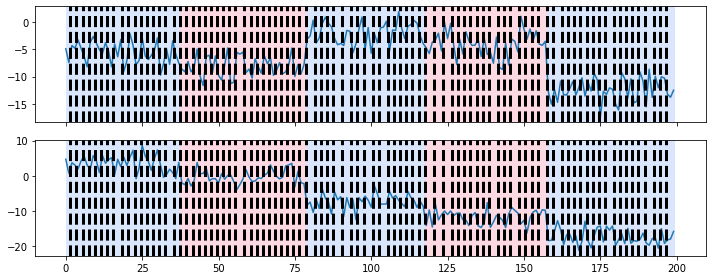

48.986192514901376


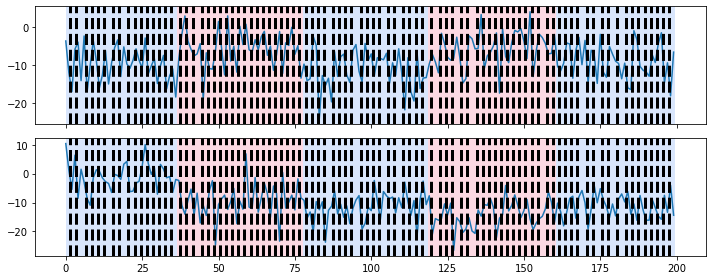

68.44709209317296


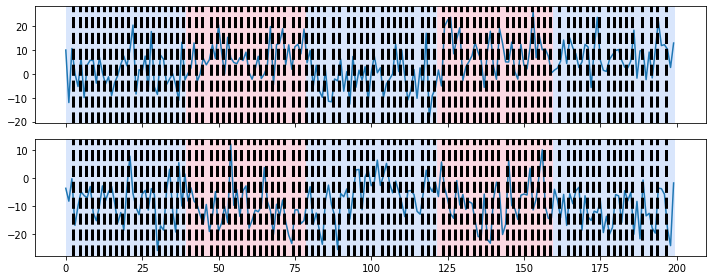

1.8009672650249755


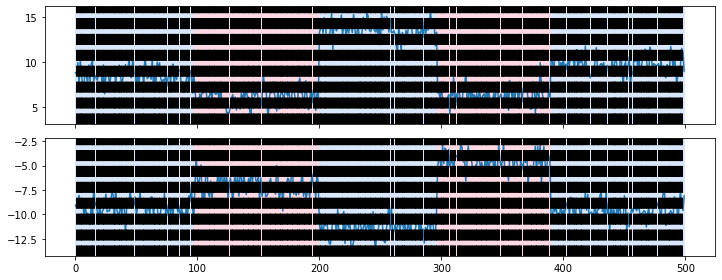

6.797989864130681


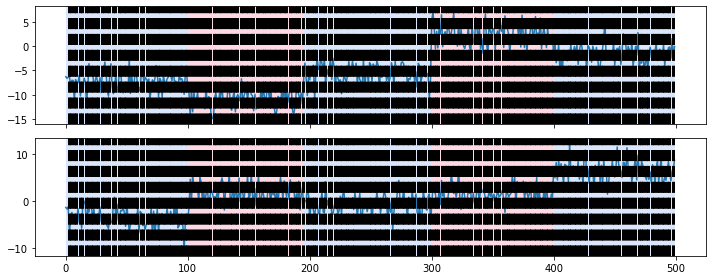

35.56690975093239


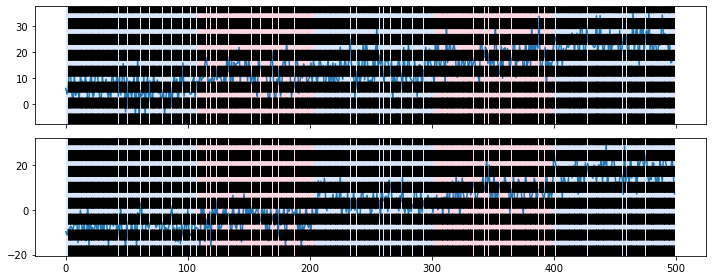

81.84597077225722


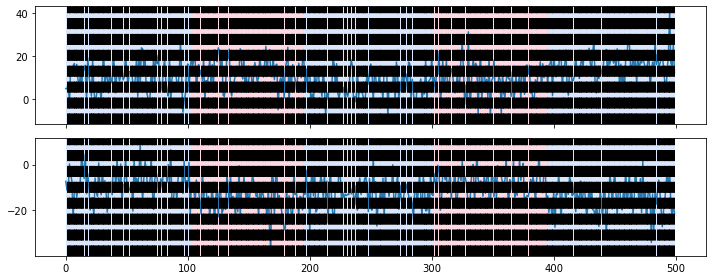

1.7845156978225905


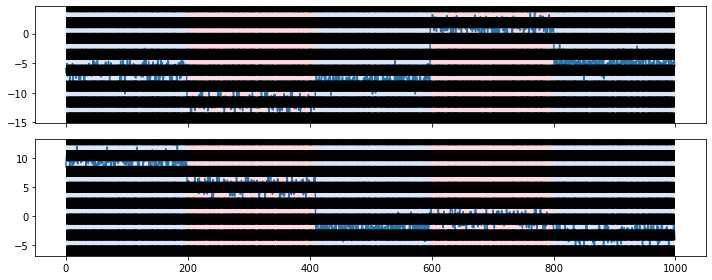

8.19459589083771


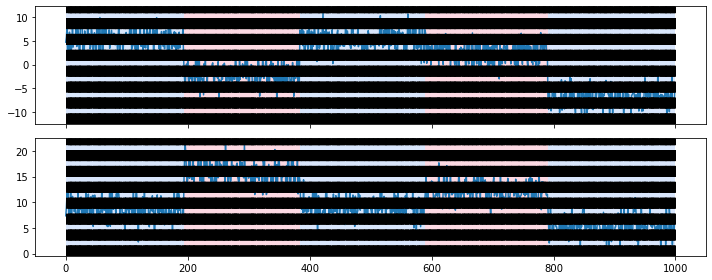

45.33540429051644


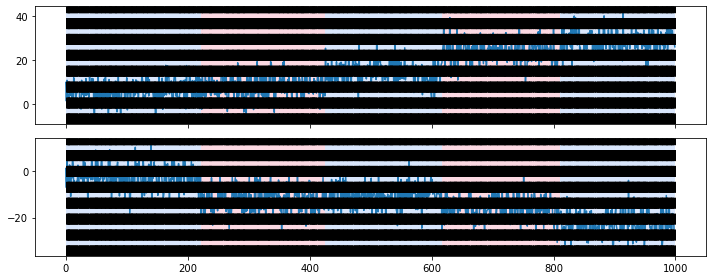

85.69529602513713


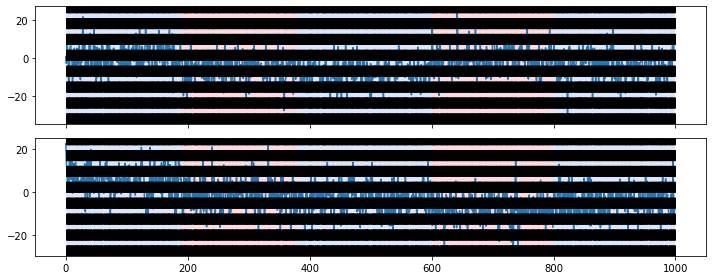

2.600054045559033


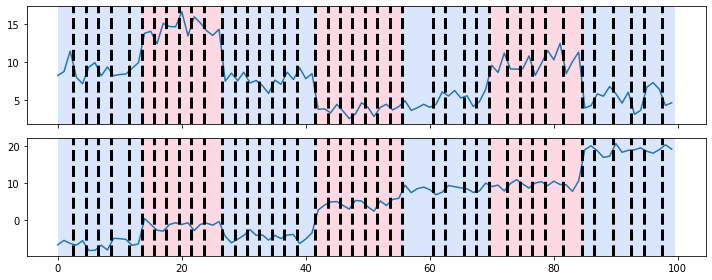

6.782429133181625


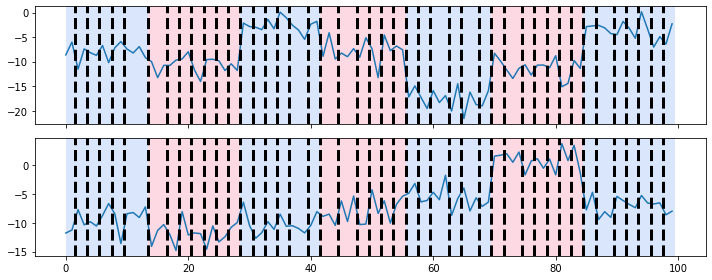

49.36575907459515


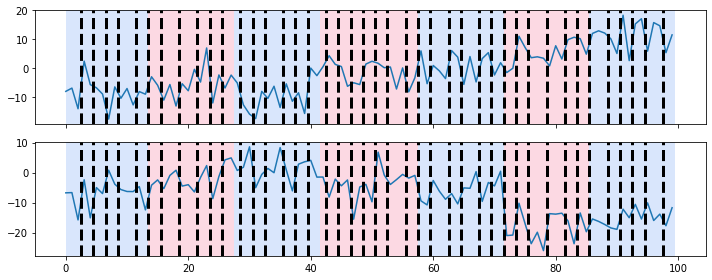

82.72048401870862


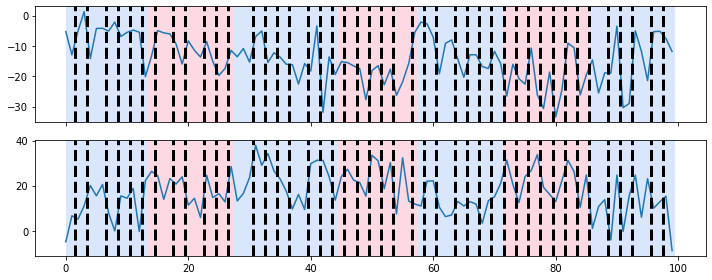

1.8337971282626682


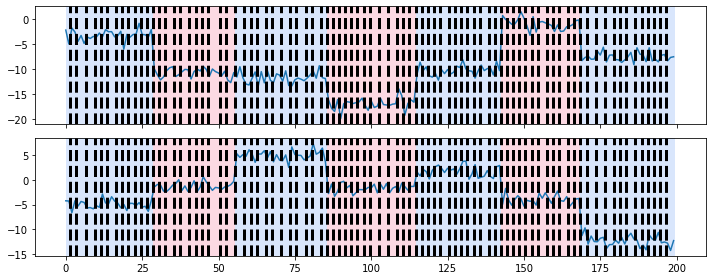

9.180164534741067


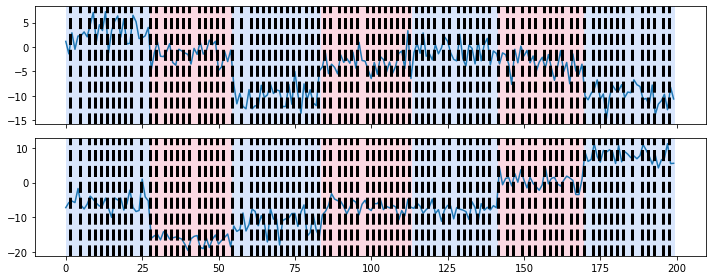

53.306603184147434


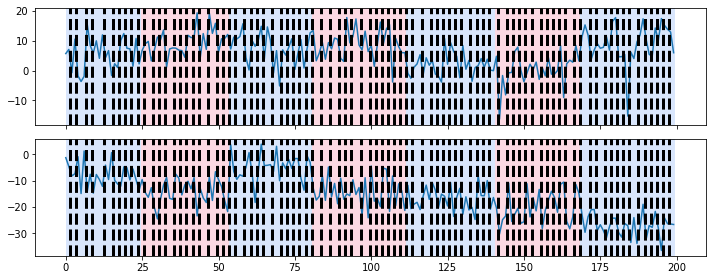

101.60512308383514


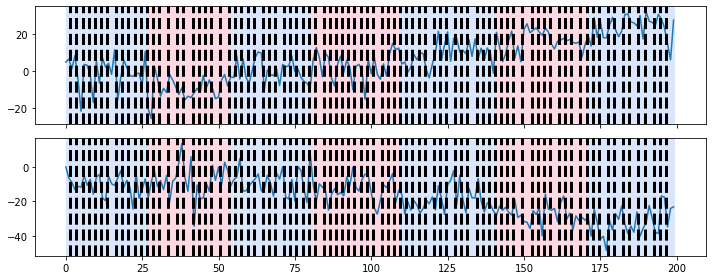

2.1224833586733958


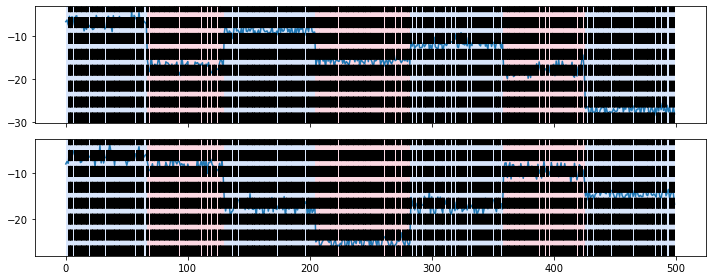

7.824408905597743


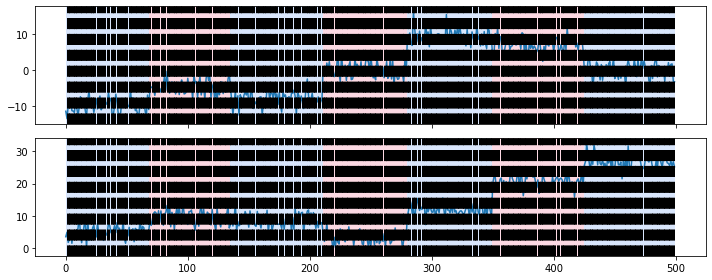

39.62517532925109


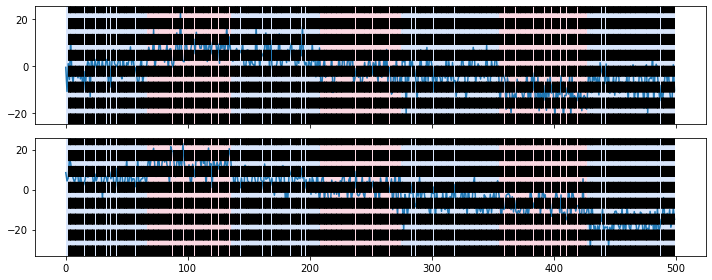

119.72404333086821


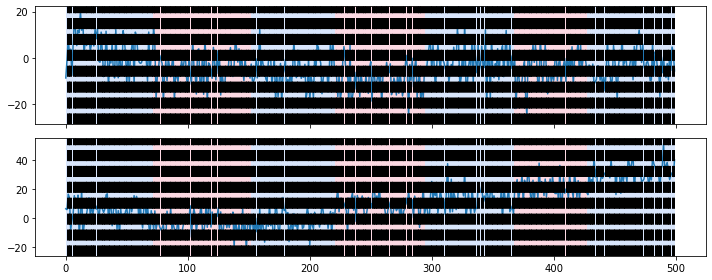

2.3196169298541864


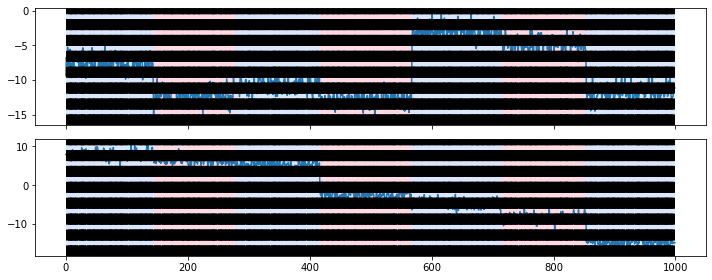

7.531325141711006


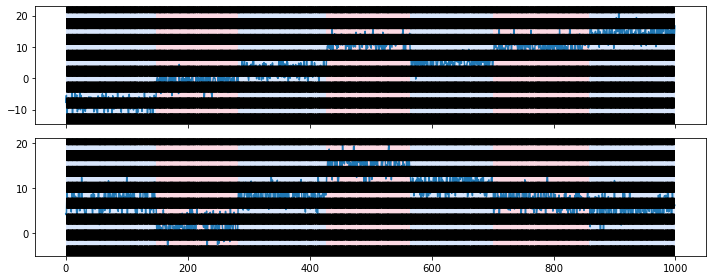

42.7272209609397


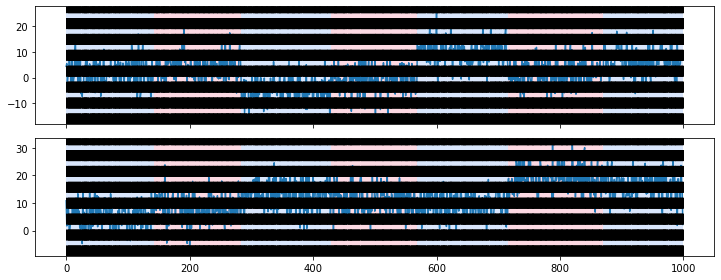

92.19127486403457


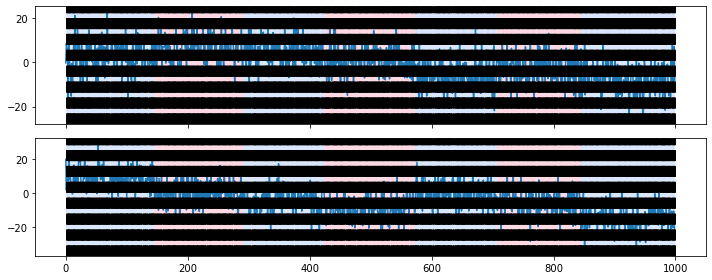

1.7796606035566653


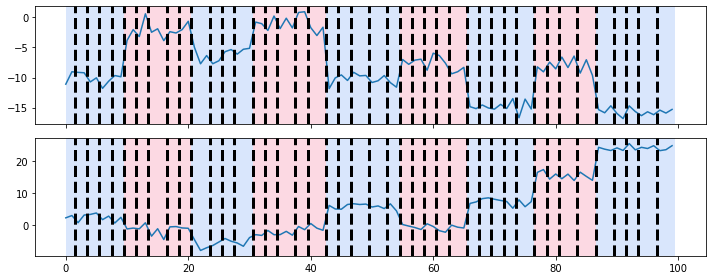

3.9313854964694857


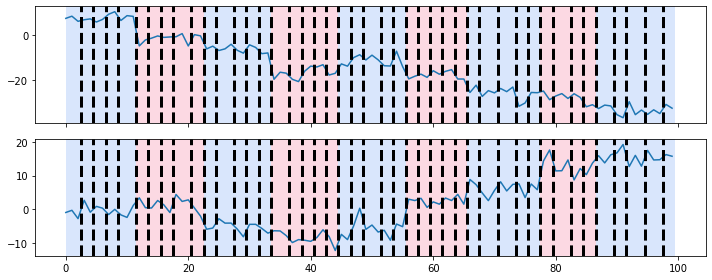

15.751535451088964


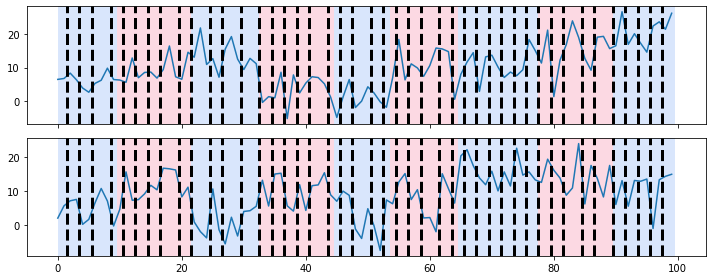

101.12702736733183


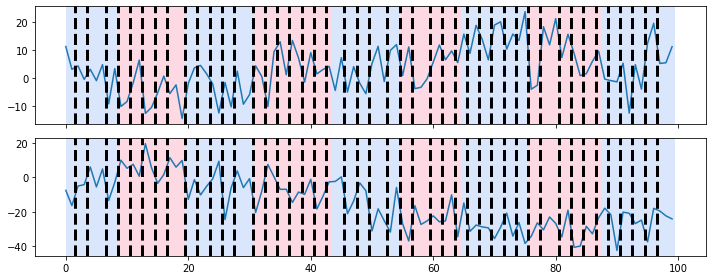

1.0809435397541374


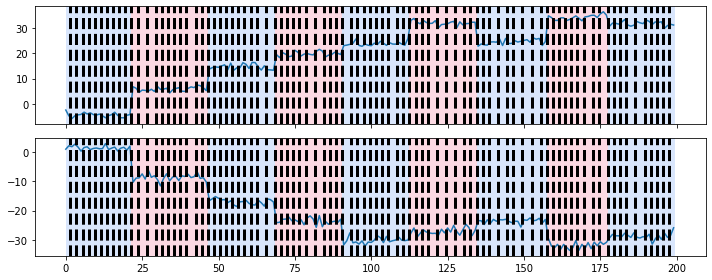

5.746769034248477


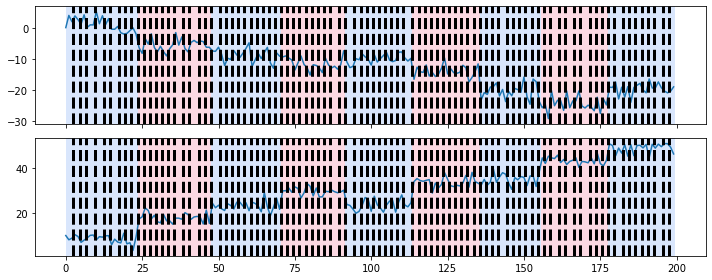

48.0120795033935


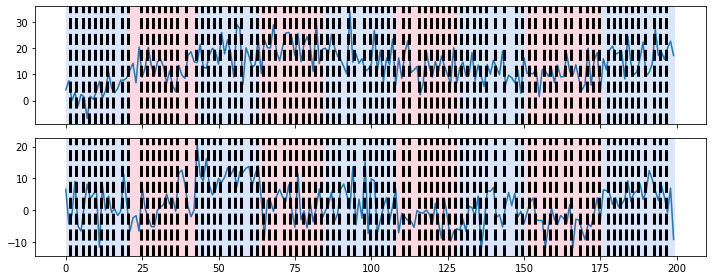

115.60676420017663


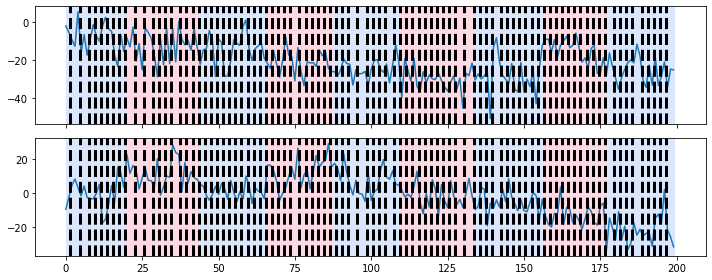

2.044792765390194


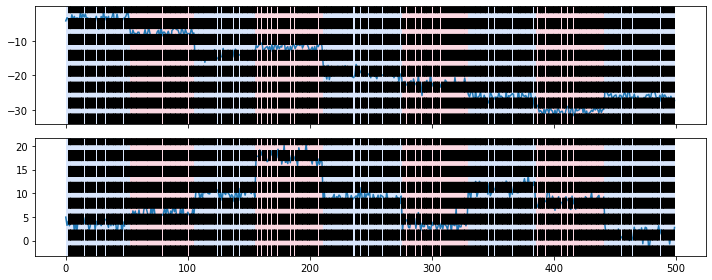

8.309818400028588


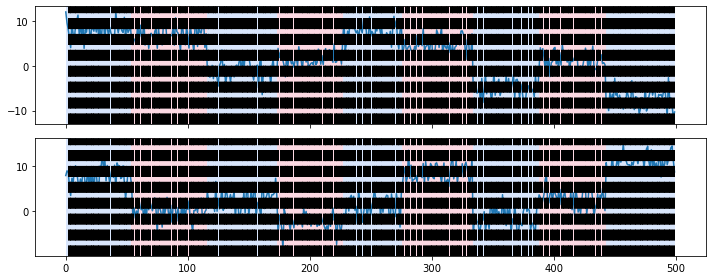

54.36531473219568


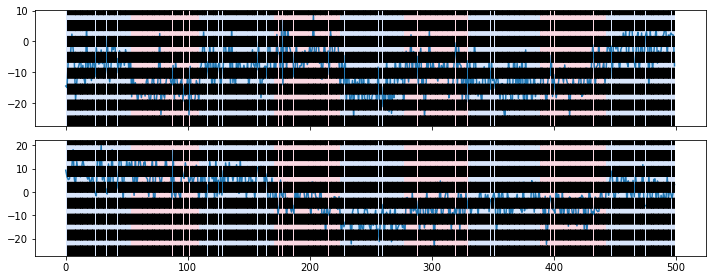

83.31191329661026


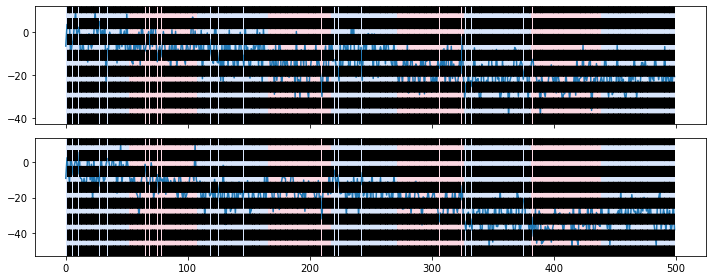

3.8102157004390076


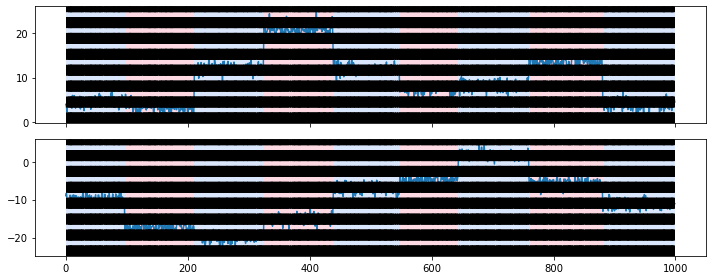

8.727799482239691


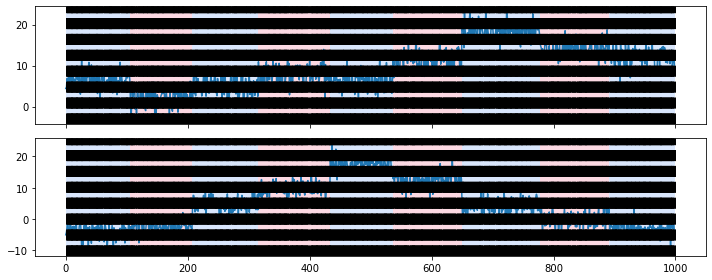

43.204377160258936


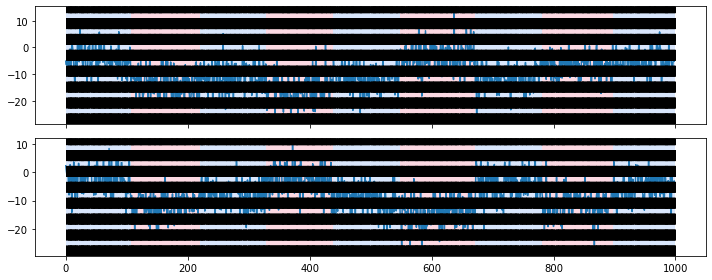

95.9737005116753


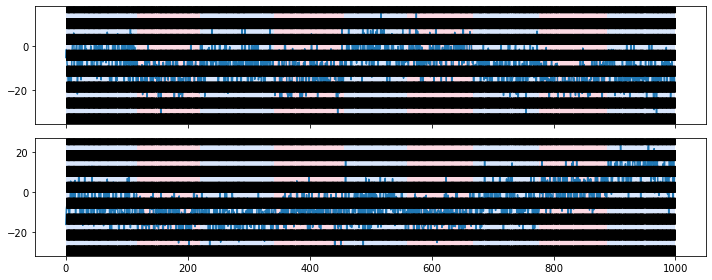

23.4840889716583


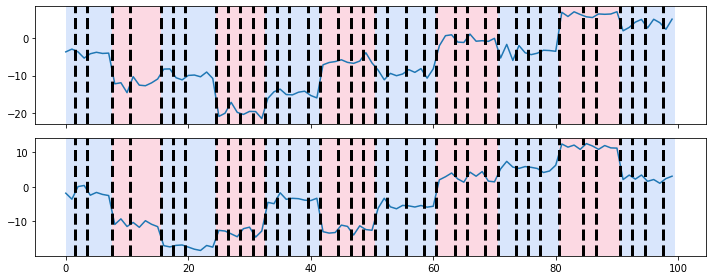

7.76251204249111


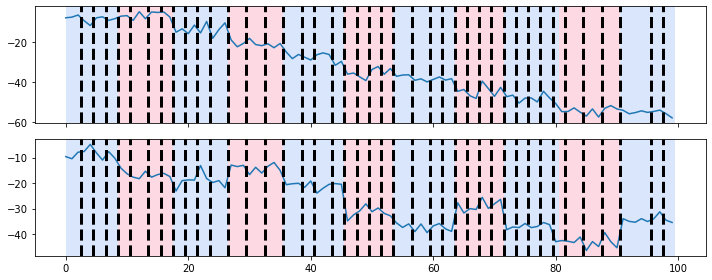

57.128368118057516


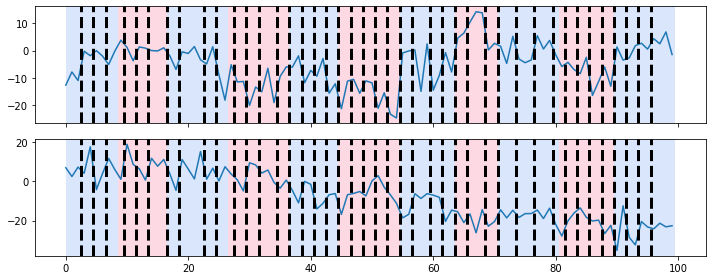

253.5029450145568


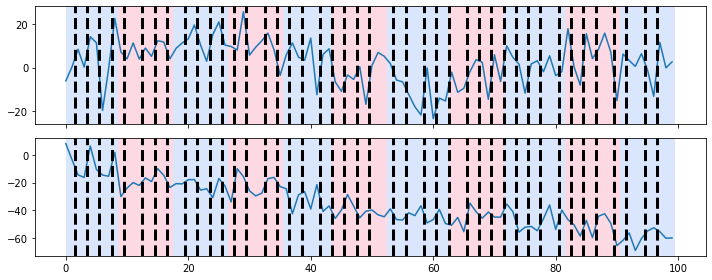

9.841432121577807


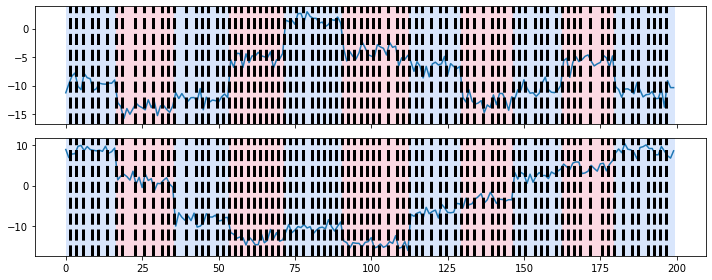

8.119180084474355


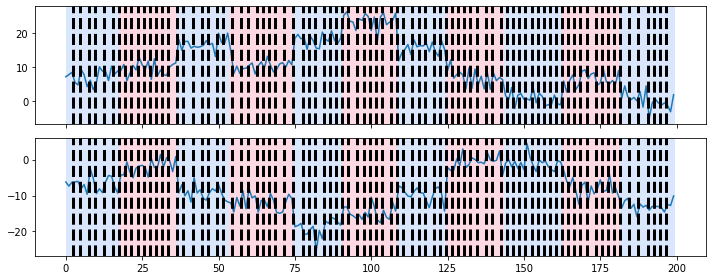

52.41072613883807


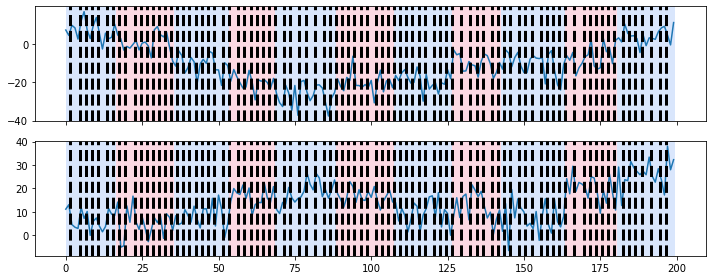

63.40949549918611


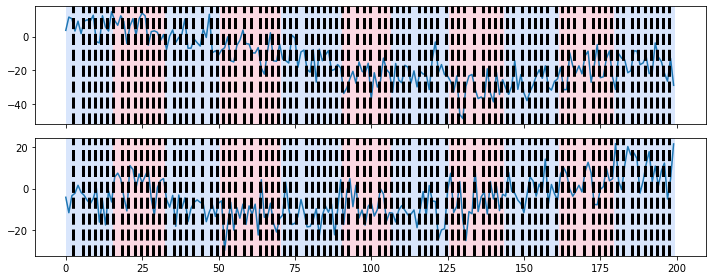

6.02939874320061


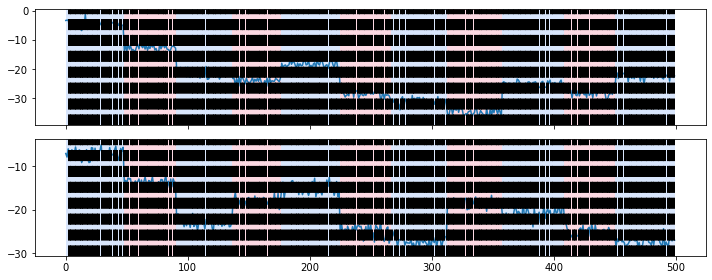

17.698506196274472


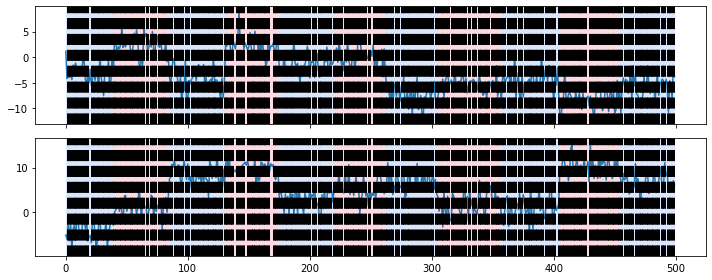

55.070318560513996


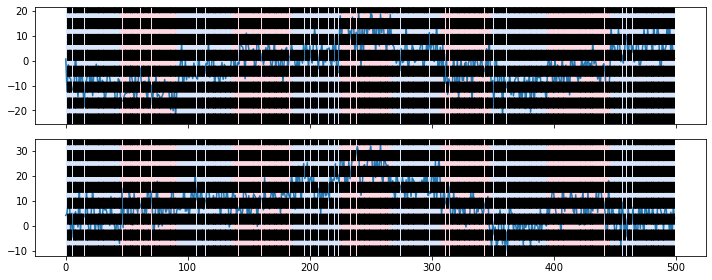

106.44345830708566


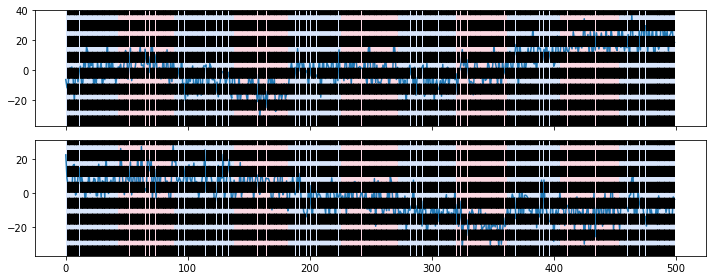

11.379186167992716


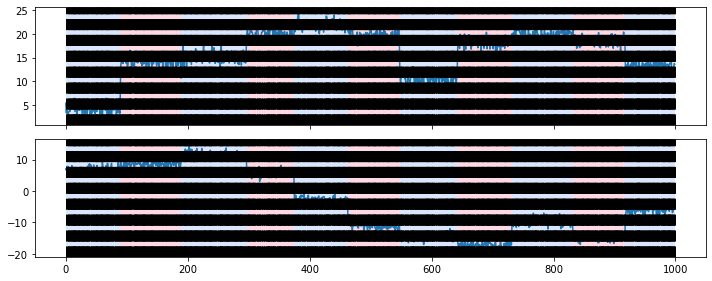

7.569336810144562


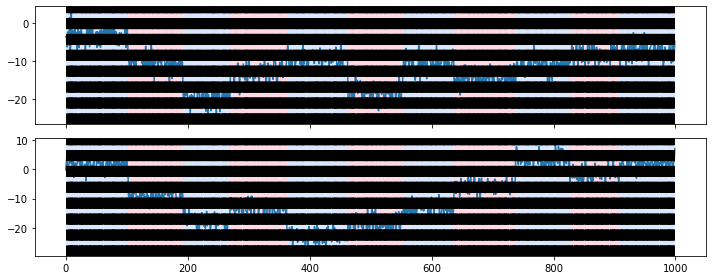

51.90586282100244


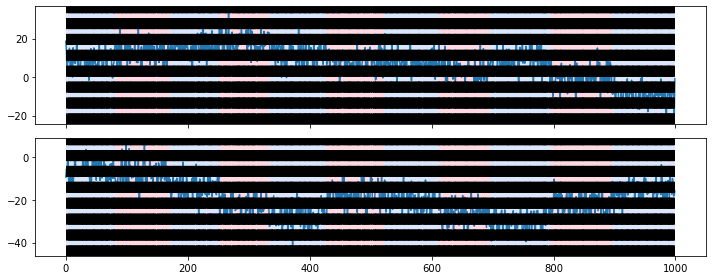

100.94592128098483


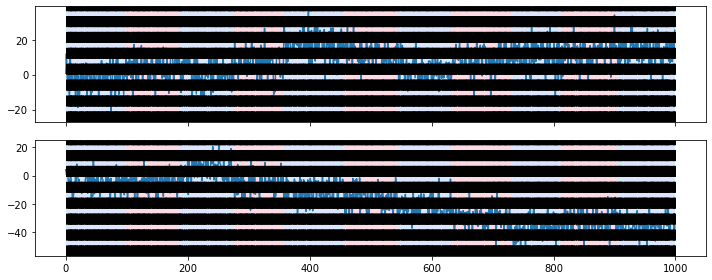

In [3]:
# to detect mean shift, use the faster dynamic programming algorithm in rpt.KernelCPD(kernel="linear")

# generate signal
for bk in [2, 4, 6, 8, 10]:
    for T in [100, 200, 500, 1000]:
        for sigma in [1, 2, 5, 7]:
            
            n_samples = T
            n_bkps = bk
            n_dims = 2
            sigma_noise = sigma
            signal, bkps = rpt.pw_constant(
                n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
            )
            signal_with_noise = signal + np.random.normal(
                scale=sigma_noise, size=signal.shape
            )



            algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)

            #result = algo.predict(n_bkps=10)  # detects 10 change-points
            
            # Mallow's Cp
            signal_10percent = np.array_split(signal_with_noise,10)[0]
            mean = signal_10percent.mean(0)
            sigma_emp = ((signal_10percent - mean)**2).sum(1).mean()
            print(sigma_emp)
            #RSS = np.linalg.norm(signal_with_noise - linearProjection(signal_with_noise, breakpoints))
            penality = 2*sigma_emp*n_dims/T
            result = algo.predict(pen=penality)  # minimizes the linearly penalized sum of costs (with beta=10)
            
            # display
            rpt.display(signal_with_noise, bkps, result)
            plt.show()

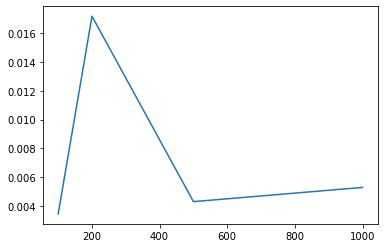

In [4]:
from ruptures.metrics import hamming

hammingList = []
for T in [100, 200, 500, 1000]:    
            
    n_samples = T
    n_bkps = bk
    n_dims = 2
    sigma_noise = 2
    signal, bkps = rpt.pw_constant(
        n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
    )
    signal_with_noise = signal + np.random.normal(
        scale=sigma_noise, size=signal.shape
    )



    algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
    algo.predict(n_bkps=10)  # detects 10 change-points
    
    # Mallow's Cp
    signal_10percent = np.array_split(signal_with_noise,10)[0]
    mean = signal_10percent.mean(0)
    sigma_emp = ((signal_10percent - mean)**2).sum(1).mean()
    penality = 2*sigma_emp*n_dims
    result = algo.predict(pen=penality)  # minimizes the linearly penalized sum of costs (with beta=10)

    hammingList.append(hamming(bkps,result)) 

plt.plot([100, 200, 500, 1000],hammingList)
plt.show()

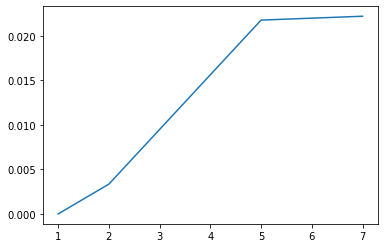

In [5]:
hammingList = []

for sigma in [1, 2, 5, 7]:  
            
    n_samples = 500
    n_bkps = bk
    n_dims = 2
    sigma_noise = sigma
    signal, bkps = rpt.pw_constant(
        n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
    )
    signal_with_noise = signal + np.random.normal(
        scale=sigma_noise, size=signal.shape
    )



    algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
    algo.predict(n_bkps=10)  # detects 10 change-points
    
    
    # Mallow's Cp
    signal_10percent = np.array_split(signal_with_noise,10)[0]
    mean = signal_10percent.mean(0)
    sigma_emp = ((signal_10percent - mean)**2).sum(1).mean()
    penality = 2*sigma_emp*n_dims
    result = algo.predict(pen=penality)  # minimizes the linearly penalized sum of costs (with beta=10)

    hammingList.append(hamming(bkps,result))  
    
plt.plot([1, 2, 5, 7],hammingList)
plt.show()

# Question 3

In [6]:
# generate signal

simulations = {}

for breakpoint in [2, 4, 6, 8, 10]:
    for T in [100, 200, 500, 1000]:
        for sigma in [1, 2, 5, 7]:
            
            n_samples = T
            n_bkps = breakpoint
            n_dims = 2
            sigma_noise = sigma
            signal, bkps = rpt.pw_constant(
                n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
            )
            signal_with_noise = signal + np.random.normal(
                scale=sigma_noise, size=signal.shape
            )

            #algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
            

In [9]:
def linearProjection(signal, breakpoints):
    T, d = signal.shape
    tau = len(breakpoints)
    proj = np.zeros((T,d))
    for k in range(tau-1):
        if k == 0 :
            proj[0:breakpoints[0]-1] = list(signal[0:breakpoints[0]-1].mean(0))
        proj[breakpoints[k]:breakpoints[k+1]-1] = list(signal[breakpoints[k]:breakpoints[k+1]-1].mean(0))
    return proj

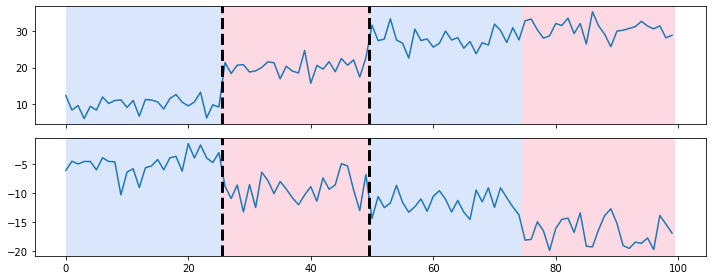

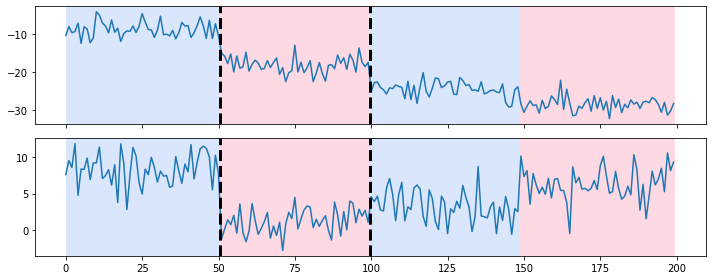

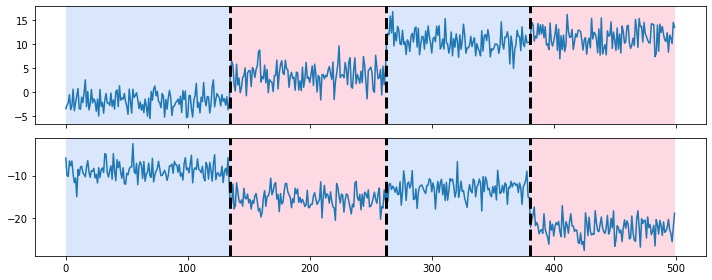

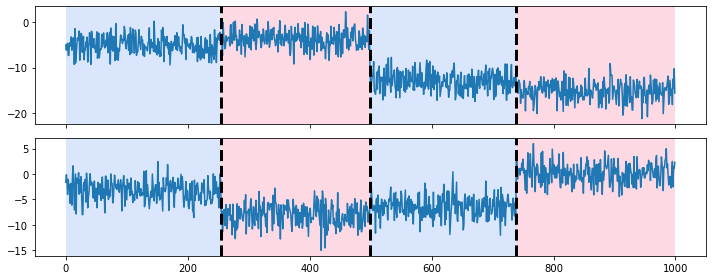

In [10]:
mse = []
for T in [100, 200, 500, 1000]:           
    n_samples = T
    n_bkps = 3
    n_dims = 2
    sigma_noise = 2
    signal, bkps = rpt.pw_constant(
        n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
    )
    signal_with_noise = signal + np.random.normal(
        scale=sigma_noise, size=signal.shape
    )



    algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
    
    

    mini = linearProjection(signal_with_noise, algo.predict(n_bkps=15))
    mini = np.linalg.norm(mini-signal_with_noise)**2
    maxi =  linearProjection(signal_with_noise, algo.predict(n_bkps=int(0.4*T)))
    maxi = np.linalg.norm(maxi-signal_with_noise)**2
    
    slope = (maxi - mini)/(int(0.4*T)-15)
    Cslope = T*slope
    penality = Cslope*n_dims/T
    result = algo.predict(pen=penality)  # minimizes the linearly penalized sum of costs (with beta=10)

    rpt.display(signal_with_noise, bkps, result)
    plt.show()

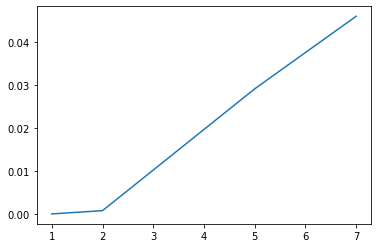

In [11]:
hammingList = []

for sigma in [1, 2, 5, 7]:  
            
    n_samples = 500
    n_bkps = bk
    n_dims = 2
    sigma_noise = sigma
    signal, bkps = rpt.pw_constant(
        n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
    )
    signal_with_noise = signal + np.random.normal(
        scale=sigma_noise, size=signal.shape
    )



    algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
    algo.predict(n_bkps=10)  # detects 10 change-points
    
    
    # Mallow's Cp
    signal_10percent = np.array_split(signal_with_noise,10)[0]
    mean = signal_10percent.mean(0)
    sigma_emp = ((signal_10percent - mean)**2).sum(1).mean()
    penality = 2*sigma_emp*n_dims
    result = algo.predict(pen=penality)  # minimizes the linearly penalized sum of costs (with beta=10)

    hammingList.append(hamming(bkps,result))  
    
plt.plot([1, 2, 5, 7],hammingList)
plt.show()

# Question 4

In [12]:
M = 9

def gm_hat(lambd, m, R, lambda_n = 12):
    a = lambda_n/(M+1-R)
    return 0.5*(1+np.cos(2*np.pi*((lambd-a*m)/(a*R)+0.5)))*np.logical_and(-R*a<= lambd - a*m, lambd-a*m < 0)

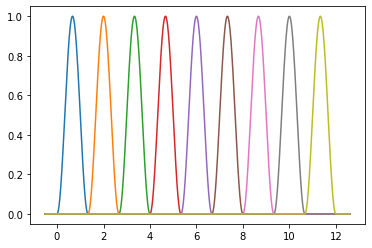

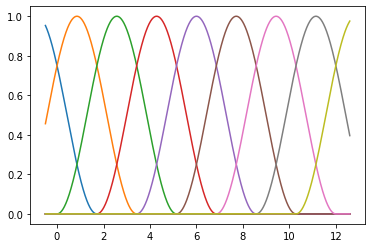

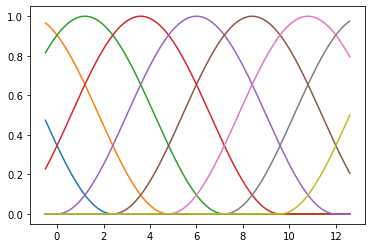

In [13]:
for R in [1,3,5]:
    for m in range(1,M+1):
        lambd = np.linspace(-0.5,12.6,1000)
        y = [gm_hat(x, m,R) for x in lambd]
        plt.plot(lambd,y)
    plt.show()

# Question 5

In [14]:
from loadmydata.load_molene_meteo import load_molene_meteo_dataset
from scipy.spatial.distance import pdist, squareform
from math import asin, cos, radians, sin, sqrt
from pygsp import graphs
from matplotlib.dates import DateFormatter



In [15]:
data_df, stations_df, description = load_molene_meteo_dataset()

In [16]:
def get_geodesic_distance(point_1, point_2) -> float:
    """
    Calculate the great circle distance (in km) between two points
    on the earth (specified in decimal degrees)

    https://stackoverflow.com/a/4913653
    """

    lon1, lat1 = point_1
    lon2, lat2 = point_2

    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def get_exponential_similarity(
    condensed_distance_matrix, bandwidth, threshold
):
    exp_similarity = np.exp(
        -(condensed_distance_matrix ** 2) / bandwidth / bandwidth
    )
    res_arr = np.where(exp_similarity > threshold, exp_similarity, 0.0)
    return res_arr

In [17]:
# convert temperature from Kelvin to Celsius
data_df["temp"] = data_df.t - 273.15  # temperature in Celsius

temperature_df = data_df.pivot(
    index="date", values="temp", columns="station_name"
)

# only keep a subset of stations with no missing values

STATION_LIST = list(temperature_df.columns[temperature_df.isna().sum()==0].values)
STATION_with_missing_values = list(temperature_df.columns[temperature_df.isna().sum()>0].values)


keep_cond = stations_df.Nom.isin(STATION_LIST)
stations_df = stations_df[keep_cond]
keep_cond = data_df.station_name.isin(STATION_LIST)
data_df = data_df[keep_cond].reset_index().drop("index", axis="columns")

In [18]:
stations_np = stations_df[["Longitude", "Latitude"]].to_numpy()
dist_mat_condensed = pdist(stations_np, metric=get_geodesic_distance)
dist_mat_square = squareform(dist_mat_condensed)

In [19]:
print("The stations with missing values are : \n",STATION_with_missing_values)

The stations with missing values are : 
 ['ARZAL', 'BATZ', 'BEG_MEIL', 'BREST-GUIPAVAS', 'BRIGNOGAN', 'CAMARET', 'LANDIVISIAU', 'LANNAERO', 'LANVEOC', 'OUESSANT-STIFF', 'PLOUAY-SA', 'PLOUDALMEZEAU', 'PLOUGONVELIN', 'QUIMPER', 'RIEC SUR BELON', 'SIZUN', 'ST NAZAIRE-MONTOIR', 'VANNES-MEUCON']


In [20]:
sigma = np.median(dist_mat_condensed)  # median heuristic
threshold = 0.83
adjacency_matrix_gaussian = squareform(
    get_exponential_similarity(dist_mat_condensed, sigma, threshold)
)
G_gaussian = graphs.Graph(adjacency_matrix_gaussian)
print(
    f"The graph is {'not ' if not G_gaussian.is_connected(recompute=True) else ''}connected, with {G_gaussian.N} nodes, {G_gaussian.Ne} edges"
)

The graph is connected, with 37 nodes, 75 edges


40


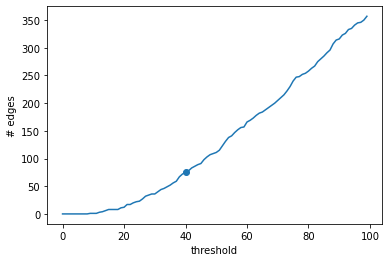

In [21]:
thresholds = list(range(100))
connected = []
edges = []

for threshold in thresholds:
    adjacency_matrix = squareform((dist_mat_condensed < threshold).astype(int))
    G = graphs.Graph(adjacency_matrix)
    connected.append(G.is_connected())
    edges.append(G.Ne)
    
i = connected.index(True)
print(i)

plt.plot(thresholds, edges)
plt.ylabel("# edges")
plt.xlabel("threshold")
plt.scatter([thresholds[i]], [edges[i]])
plt.show()

832


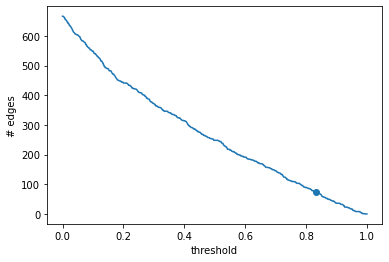

In [22]:
thresholds = np.linspace(0, 1, 1001)
connected = []
edges = []

for threshold in thresholds:
    adjacency_matrix = squareform(
        get_exponential_similarity(dist_mat_condensed, sigma, threshold)
    )
    G = graphs.Graph(adjacency_matrix)
    connected.append(G.is_connected())
    edges.append(G.Ne)
    
i = connected.index(False) - 1

print(i)

plt.plot(thresholds, edges)
plt.ylabel("# edges")
plt.xlabel("threshold")
plt.scatter([thresholds[i]], [edges[i]])
plt.show()

In [23]:
# drop the NaNs
temperature_df_no_nan = data_df.pivot(
    index="date", values="temp", columns="station_name"
)



laplacian_matrix = G_gaussian.L.todense()


#smoothness = float(signal.T.dot(laplacian_matrix).dot(signal))
#print(f"Smoothness is {smoothness:.2f} ({choosen_hour})")



In [24]:
signals = temperature_df_no_nan.to_numpy()
smoothness_arr = np.array(
    [float(signal.T.dot(laplacian_matrix).dot(signal)) for signal in signals]
)
smoothness_df = pd.Series(
    data=smoothness_arr, index=temperature_df_no_nan.index
)

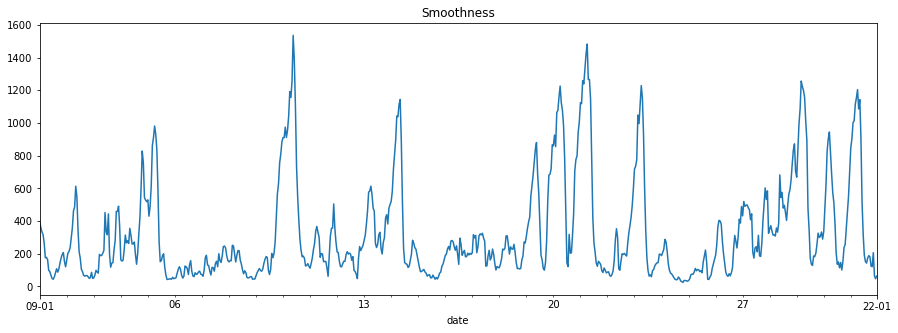

In [25]:
fig, ax = fig_ax()
smoothness_df.plot(ax=ax)
myFmt = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(myFmt)
ax.set_title("Smoothness")
plt.grid(axis="x", color="0.95")

In [26]:
np.argmin(smoothness_df)

571

In [27]:
np.argmax(smoothness_df)

225

# Question 6

In [28]:
R = 3

M = 9

# Laplacian eigendecomposition
eigenvals_line, eigenvects_line = eigh(laplacian_matrix)

def GWT(signal,m,v):
    lambda_n = eigenvals_line[-1]
    signal_fourier = eigenvects_line.T.dot(signal)
    gm = gm_hat(eigenvals_line, m, R, lambda_n)
    return gm.T.dot(signal_fourier * eigenvects_line[:, v])

def energy(signal,v,levels):
    e = 0
    for m in levels:
        e+=np.linalg.norm(GWT(signal,m,v))**2
        return e     

In [29]:
signal = signals[0]
colors = []
labels = ["Low frequency","Medium frequency","High frequency"]
for v in range(G_gaussian.N):
    i = np.argmax([energy(signal,v,[1,2,3]),energy(signal,v,[4,5,6]),energy(signal,v,[7,8,9])])
    colors.append(i)
    #print("Node ",v," is ", labels[i])

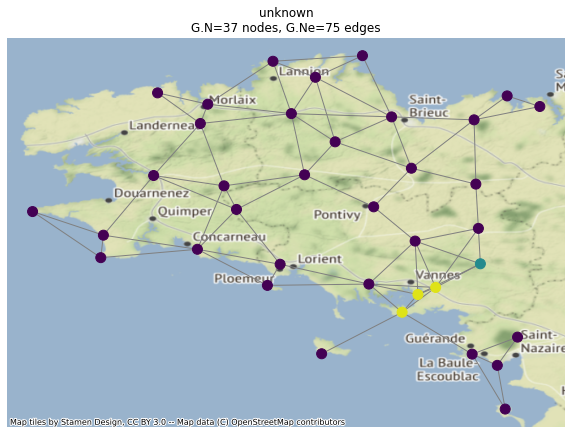

In [32]:
CRS = "EPSG:4326"

# convert pandas df to geopandas df
stations_gdf = geopandas.GeoDataFrame(
    stations_df,
    geometry=geopandas.points_from_xy(
        stations_df.Longitude, stations_df.Latitude
    ),
).set_crs(CRS)

ax = stations_gdf.geometry.plot(figsize=(10, 10))
cx.add_basemap(ax, crs=stations_gdf.crs.to_string(), zoom=8)
ax.set_axis_off()
G_gaussian.set_coordinates(stations_np)
G_gaussian.plot_signal(np.array(colors), ax=ax, colorbar = False)

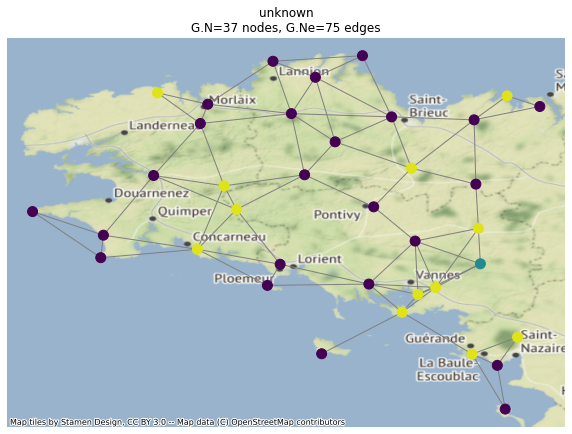

In [33]:
signal = signals[225]
colors = []
for v in range(G_gaussian.N):
    i = np.argmax([energy(signal,v,[1,2,3]),energy(signal,v,[4,5,6]),energy(signal,v,[7,8,9])])
    colors.append(i)

ax = stations_gdf.geometry.plot(figsize=(10, 10))
cx.add_basemap(ax, crs=stations_gdf.crs.to_string(), zoom=8)
ax.set_axis_off()
G_gaussian.set_coordinates(stations_np)
G_gaussian.plot_signal(np.array(colors), ax=ax, colorbar = False)

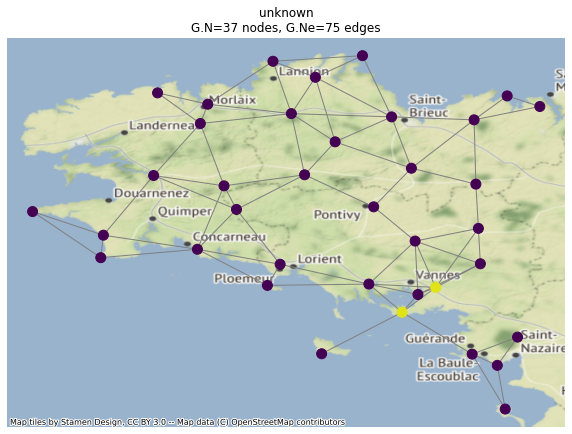

In [34]:
signal = signals[571]
colors = []
for v in range(G_gaussian.N):
    i = np.argmax([energy(signal,v,[1,2,3]),energy(signal,v,[4,5,6]),energy(signal,v,[7,8,9])])
    colors.append(i)

ax = stations_gdf.geometry.plot(figsize=(10, 10))
cx.add_basemap(ax, crs=stations_gdf.crs.to_string(), zoom=8)
ax.set_axis_off()
G_gaussian.set_coordinates(stations_np)
G_gaussian.plot_signal(np.array(colors), ax=ax, colorbar = False)

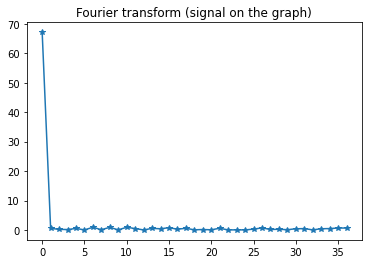

In [35]:
# Fourier transform
signal_fourier = eigenvects_line.T.dot(signal)


# plot
plt.title("Fourier transform (signal on the graph)")
plt.plot(abs(signal_fourier), "*-")
plt.show()

# Question 7

In [ ]:
T, V = signals.shape

class_array = np.zeros(T, dtype = int)
y = np.zeros(T)

for timestamp in range(T):
    average_temperature = signals[timestamp].mean()
    y[timestamp] = average_temperature
    
    frequency = np.array([0,0,0])
    for v in range(G_gaussian.N):
        signal = signals[timestamp]
        i = np.argmax([energy(signal,v,[1,2,3]),energy(signal,v,[4,5,6]),energy(signal,v,[7,8,9])])
        frequency[i]+=1
    class_array[timestamp] = np.argmax(frequency)
        
x = np.arange(y.shape[0])

colors = ["b", "m", "r"]  # three colours=three classes
color_array = np.take(colors, class_array)
fig, ax = fig_ax()
ax.plot(x, y, alpha=0.5)
ax.scatter(x, y, c=color_array)
plt.show()

# Question 8

In [36]:
def get_line_graph(n_nodes=10) -> graphs.Graph:
    """Return a line graph."""
    adjacency_matrix = np.eye(n_nodes)
    adjacency_matrix = np.c_[adjacency_matrix[:, -1], adjacency_matrix[:, :-1]]
    adjacency_matrix[-1,0] = 0
    adjacency_matrix += adjacency_matrix.T
    line_graph = graphs.Graph(adjacency_matrix)
    line_graph.set_coordinates(kind="line2D")
    line_graph.compute_laplacian("combinatorial")
    return line_graph


/Users/macrafa/opt/anaconda3/lib/python3.8/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


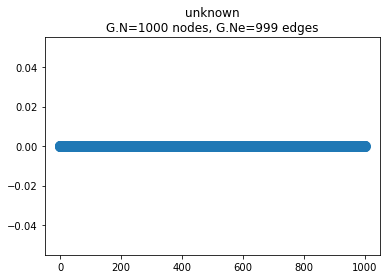

In [37]:
line_graph = get_line_graph(T) 
line_graph.plot()

In [38]:
R = 3

M = 9

# Laplacian eigendecomposition

eigenvals, eigenvects = eigh(laplacian_matrix)
eigenvals_line, eigenvects_line = eigh(line_graph.L.todense())


def GWT(signal,m,v):
    lambda_n = eigenvals_line[-1]
    signal_fourier = eigenvects_line.T.dot(signal)
    gm = gm_hat(eigenvals_line, m, R, lambda_n)
    return gm.T.dot(signal_fourier * eigenvects_line[:, v])

def energy(signal,v,levels):
    e = 0
    for m in levels:
        e+=np.linalg.norm(GWT(signal,m,v))**2
        return e     

In [ ]:
eigenval_cart = np.zeros((V,T))